In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%config InlineBackend.figure_format = 'retina'

# Read data

In [92]:
df = pd.read_csv('C:/Users/FPS SOLUTIONS/Downloads/SeoulBikeData.csv', encoding='unicode_escape')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['Date', 'BikeCount', 'Hour', 'Temp', 'Humid', 'WindSpeed', 'Visibility', 
              'DewPTemp', 'SolarRad', 'Rainfall', 'Snowfall', 'Season', 'Holiday', 'Functioning']

df

,Date,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [93]:
# Change holiday/no holiday to yes/no
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}

df = df.replace(label)

df

,Date,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


# Analyzing time series

<AxesSubplot:>

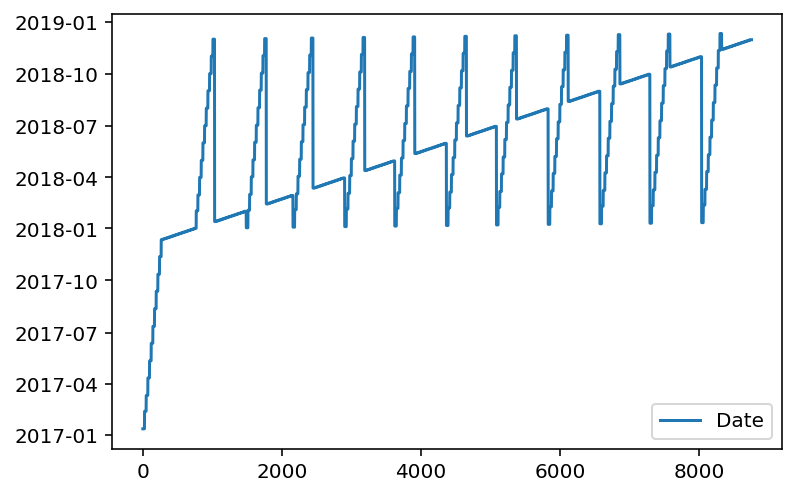

In [94]:
# The record dates are weird. Dates are unsorted
df.plot(y='Date')

In [95]:
# Create hh:00:00 from hour columns
hour_str = [str(hour)+':00:00' if hour>9 else '0'+str(hour)+':00:00' for hour in df['Hour']]

# Add hh:00:00 after date columns
df['Date'] = [str(date)[:10]+' '+hour for date, hour in zip(df['Date'].values, hour_str)]

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30 19:00:00,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,2018-11-30 20:00:00,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,2018-11-30 21:00:00,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,2018-11-30 22:00:00,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


<AxesSubplot:>

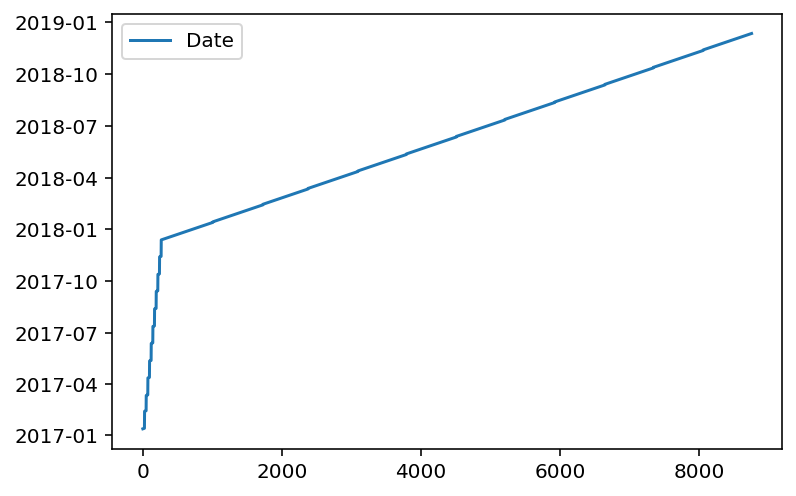

In [96]:
# Sort dates
df = df.sort_values(by=['Date']).reset_index(drop=True)

df.plot(y='Date')

In [97]:
# Bike count is recorded on 12 every month from Jan to Dec 2017
df['Date'].dt.date.unique()[:12]

array([datetime.date(2017, 1, 12), datetime.date(2017, 2, 12),
       datetime.date(2017, 3, 12), datetime.date(2017, 4, 12),
       datetime.date(2017, 5, 12), datetime.date(2017, 6, 12),
       datetime.date(2017, 7, 12), datetime.date(2017, 8, 12),
       datetime.date(2017, 9, 12), datetime.date(2017, 10, 12),
       datetime.date(2017, 11, 12), datetime.date(2017, 12, 12)],
      dtype=object)

In [98]:
# From 12 Dec onwards, bike count is recorded everyday
df['Date'].dt.date.unique()[12:24]

array([datetime.date(2017, 12, 13), datetime.date(2017, 12, 14),
       datetime.date(2017, 12, 15), datetime.date(2017, 12, 16),
       datetime.date(2017, 12, 17), datetime.date(2017, 12, 18),
       datetime.date(2017, 12, 19), datetime.date(2017, 12, 20),
       datetime.date(2017, 12, 21), datetime.date(2017, 12, 22),
       datetime.date(2017, 12, 23), datetime.date(2017, 12, 24)],
      dtype=object)

In [99]:
# Create days and months as new features
dates = df.Date
days = [date.weekday() for date in dates]
months = [date.month for date in dates]

df['day'] = days
df['month'] = months

df

,Date,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Season,Holiday,Functioning,day,month
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,3,1
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,3,1
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes,3,1
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,3,1
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-11 19:00:00,1466,19,9.8,46,2.8,1945,-1.2,0.0,0.0,0.0,Autumn,No,Yes,1,12
8756,2018-12-11 20:00:00,1292,20,9.0,48,1.9,1879,-1.4,0.0,0.0,0.0,Autumn,No,Yes,1,12
8757,2018-12-11 21:00:00,1189,21,8.5,50,0.5,1707,-1.3,0.0,0.0,0.0,Autumn,No,Yes,1,12
8758,2018-12-11 22:00:00,1023,22,7.6,55,1.7,1694,-0.8,0.0,0.0,0.0,Autumn,No,Yes,1,12


<AxesSubplot:xlabel='Date'>

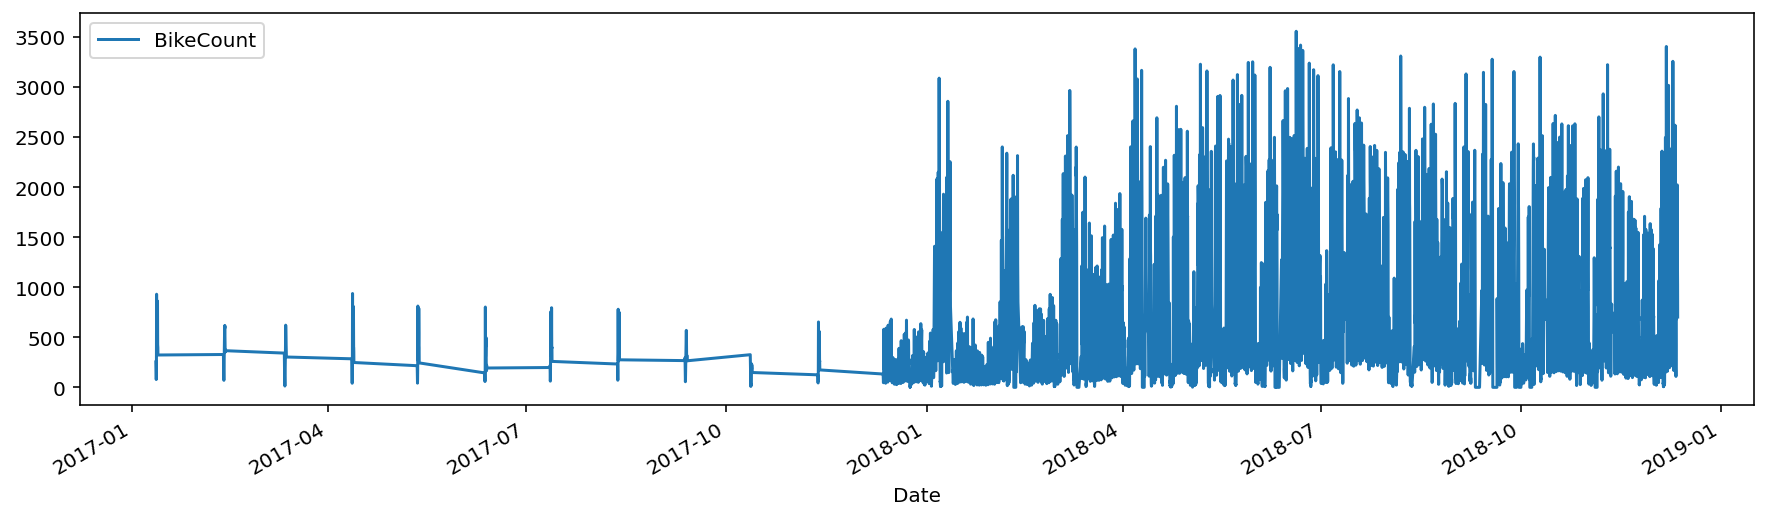

In [100]:
df.plot(x='Date', y='BikeCount', figsize=(15,4))

In general, the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2018.

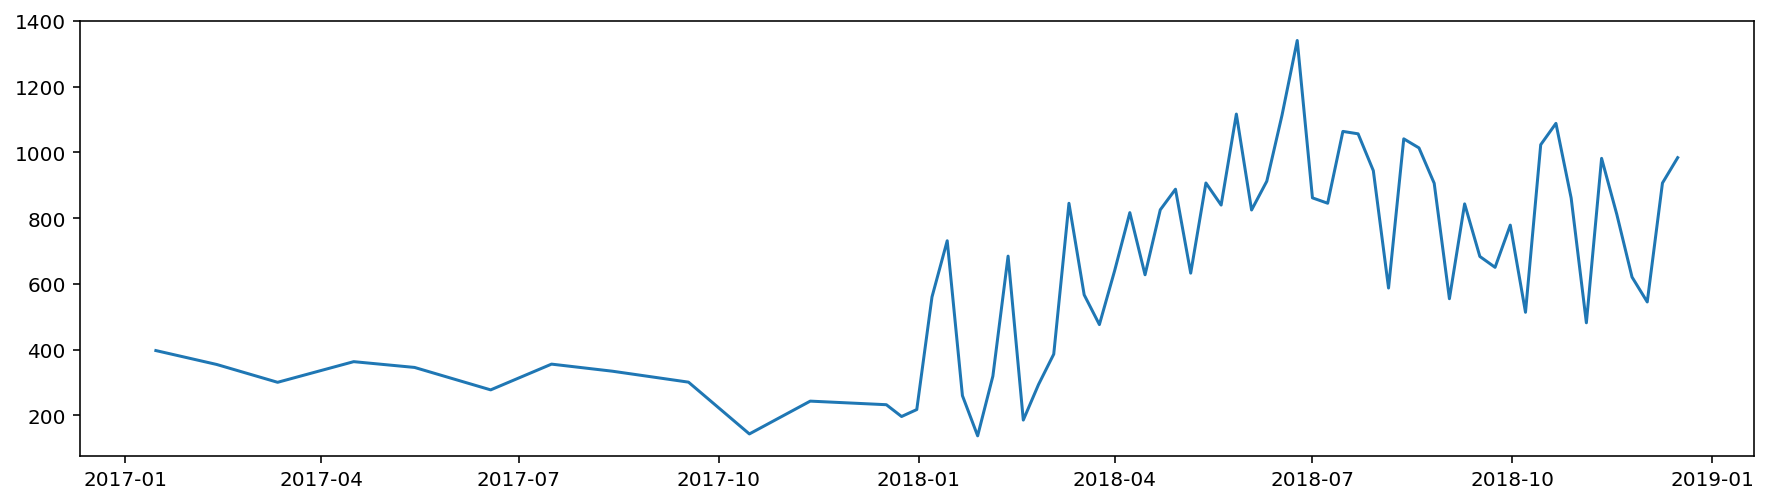

In [101]:
# Resample data weekly 
df_w = df.resample('W', on='Date').mean().dropna()

plt.figure(figsize=(15,4))
plt.plot(df_w.index, df_w.BikeCount)

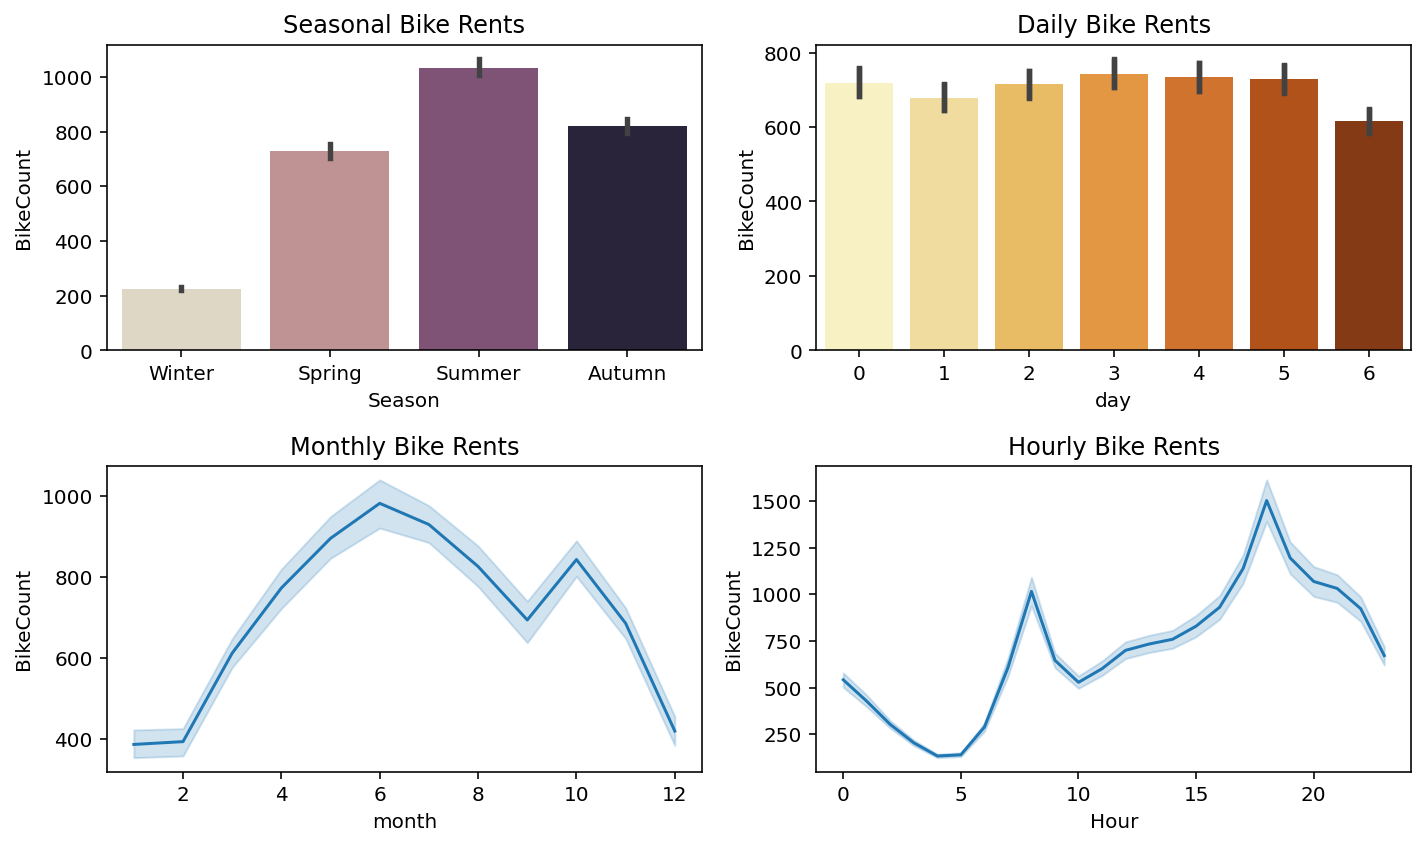

In [102]:
x = [['Season', 'day'], ['month', 'Hour']]
title = [['Seasonal Bike Rents', 'Daily Bike Rents'], 
         ['Monthly Bike Rents', 'Hourly Bike Rents']]

f, ax = plt.subplots(2,2,figsize=(10,6))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='BikeCount', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='BikeCount', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='BikeCount', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity. The bike counts peak in the afternoon (from 15.00 to 20.00) where temperature is the highest, with the most visibility, windspeed, and least humidity. 

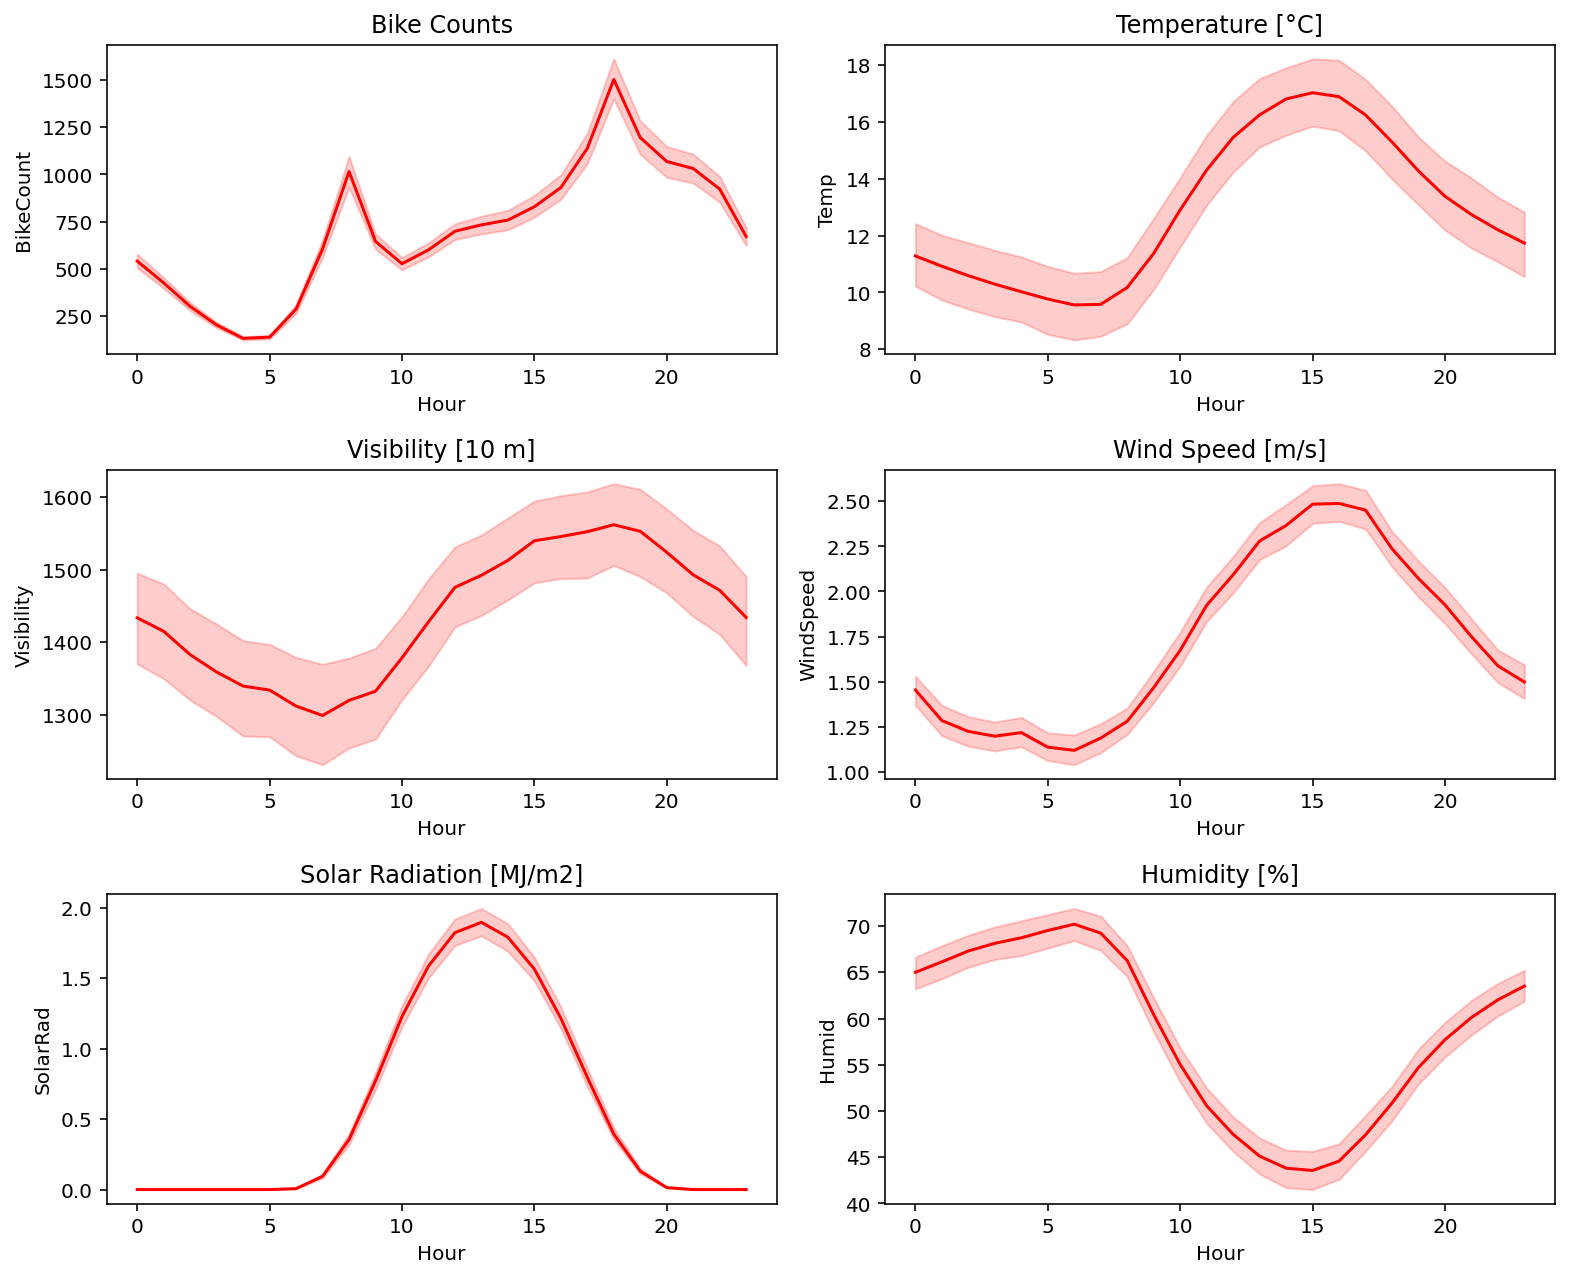

In [103]:
y = [['BikeCount', 'Temp'], ['Visibility', 'WindSpeed'], ['SolarRad', 'Humid']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()

The monthly movement of bike counts seems only to correlate with temperature. The movement of snowfall correlates with season i.e. high snowfall from January to March during winter season. However, there is a bizarre drop of rainfall in July. It seems there is no rain during the occassionally rainy season in July. 

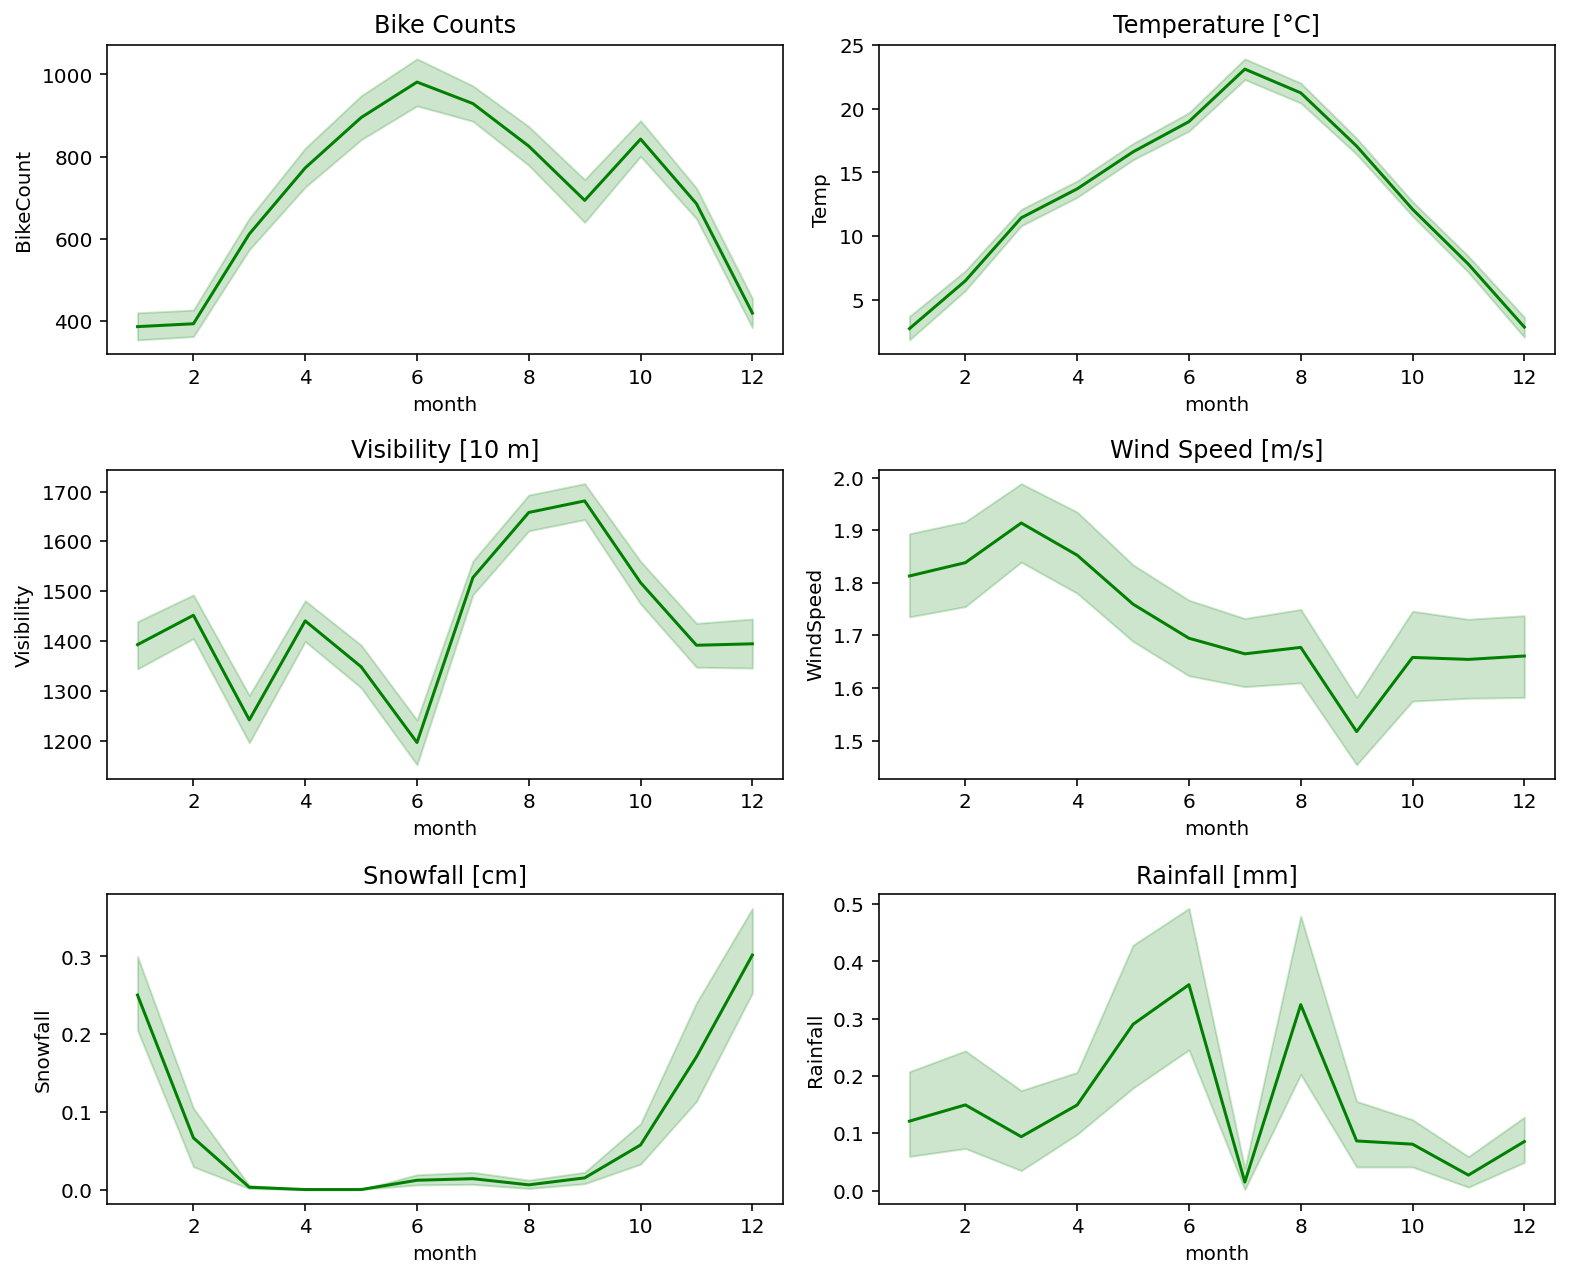

In [104]:
y = [['BikeCount', 'Temp'], ['Visibility', 'WindSpeed'], ['Snowfall', 'Rainfall']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Snowfall [cm]', 'Rainfall [mm]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=y[i][j], ax=ax[i][j], color='green')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()        

The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity. The highest count of rented bikes occurs in summer, while the least occurs in winter.

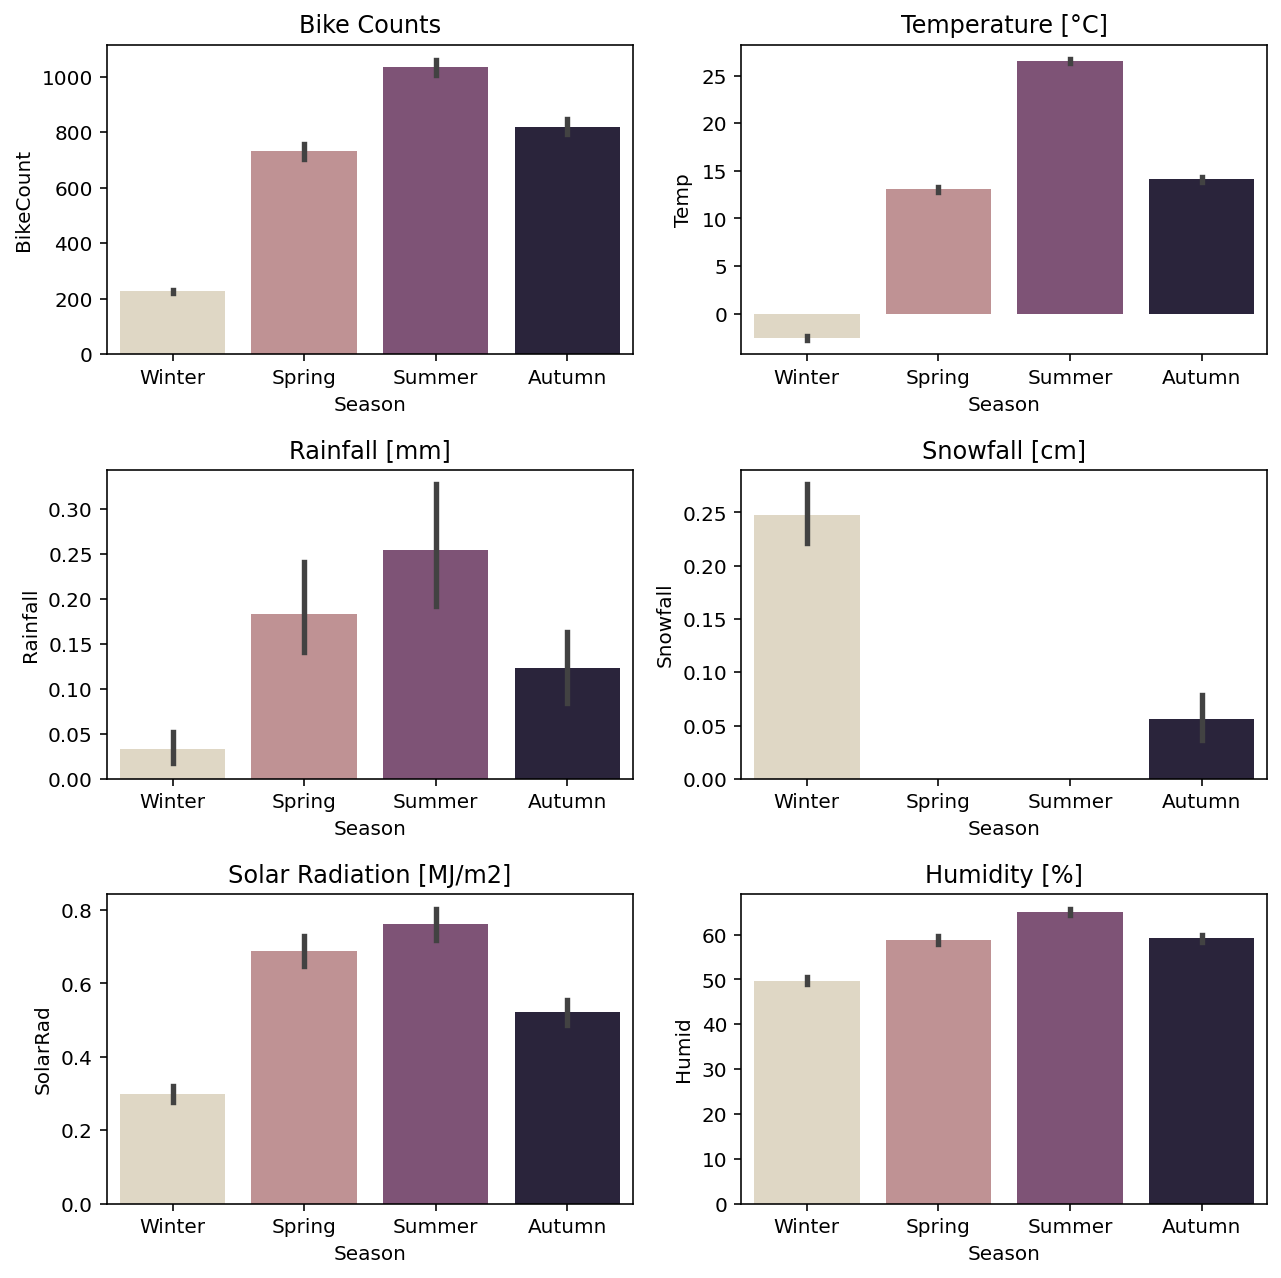

In [105]:
y = [['BikeCount', 'Temp'], ['Rainfall', 'Snowfall'], ['SolarRad', 'Humid']]
title = [['Bike Counts', 'Temperature [°C]'], ['Rainfall [mm]', 'Snowfall [cm]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(9,9))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='Season', y=y[i][j], ax=ax[i][j], palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()        

In [106]:
pd.pivot_table(df, index=['Holiday', 'Functioning'], columns='Season', values='BikeCount',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

Season               Autumn  Spring  Summer  Winter  TOTAL
Holiday Functioning                                       
No      No            223.0    48.0     NaN     NaN    271
        Yes          1841.0  2088.0  2160.0  1968.0   8057
Yes     No             24.0     NaN     NaN     NaN     24
        Yes            96.0    72.0    48.0   192.0    408
TOTAL                2184.0  2208.0  2208.0  2160.0   8760

In [107]:
dates = df[(df.Holiday=='No') & (df.Functioning=='No')].Date.dt.date.unique()

dates

array([datetime.date(2018, 2, 10), datetime.date(2018, 3, 11),
       datetime.date(2018, 4, 10), datetime.date(2018, 6, 10),
       datetime.date(2018, 6, 11), datetime.date(2018, 9, 11),
       datetime.date(2018, 9, 18), datetime.date(2018, 9, 19),
       datetime.date(2018, 9, 28), datetime.date(2018, 9, 30),
       datetime.date(2018, 10, 5), datetime.date(2018, 11, 4)],
      dtype=object)

It was found that on 10 June 2018, the bike share facility did not function temporarily from 00.00 midnight to 10.00 in the morning.

2018-06-10


<AxesSubplot:xlabel='Date'>

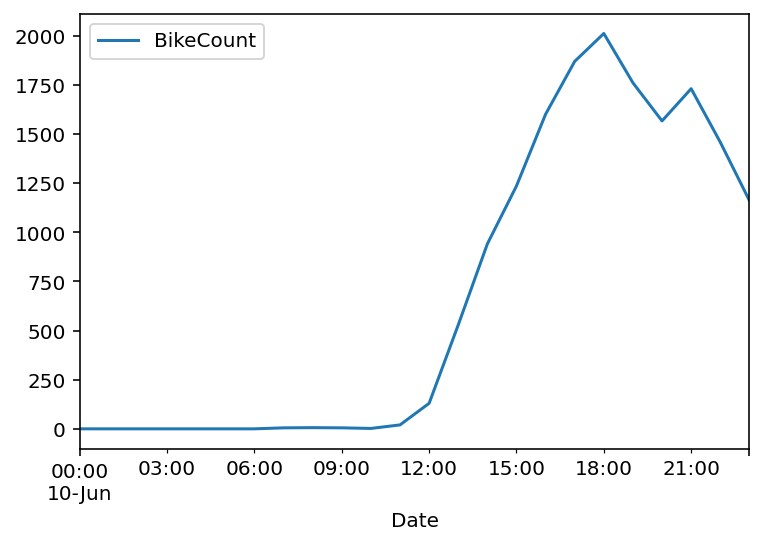

In [108]:
# Special occasion when the bike share not functioning temporarily
print(dates[3])

df[df.Date.dt.date==dates[3]].plot(x='Date', y='BikeCount')

Surprisingly on holidays, the bike share facility is working. The listed dates when holiday below are in fact public holidays in Korea, for example Korean New Year on 15-17 February 2018, Buddha's birthday on 22 March 2018, and Chuseok on 23-25 September. Except on 10 March 2018, when it was the same date of South Korea and North Korea presidential meeting with US President Donald Trump.

In [109]:
# On public holidays it keeps operating
df[(df.Holiday=='Yes') & (df.Functioning=='Yes')].Date.dt.date.unique()

array([datetime.date(2017, 12, 22), datetime.date(2017, 12, 24),
       datetime.date(2017, 12, 25), datetime.date(2017, 12, 31),
       datetime.date(2018, 1, 1), datetime.date(2018, 1, 3),
       datetime.date(2018, 1, 5), datetime.date(2018, 2, 15),
       datetime.date(2018, 2, 16), datetime.date(2018, 2, 17),
       datetime.date(2018, 3, 10), datetime.date(2018, 5, 22),
       datetime.date(2018, 6, 6), datetime.date(2018, 8, 15),
       datetime.date(2018, 9, 23), datetime.date(2018, 9, 24),
       datetime.date(2018, 9, 25)], dtype=object)

# EDA

In [110]:
def corr_heatmap(df):    
    plt.figure(figsize=(8,8))

    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='icefire')

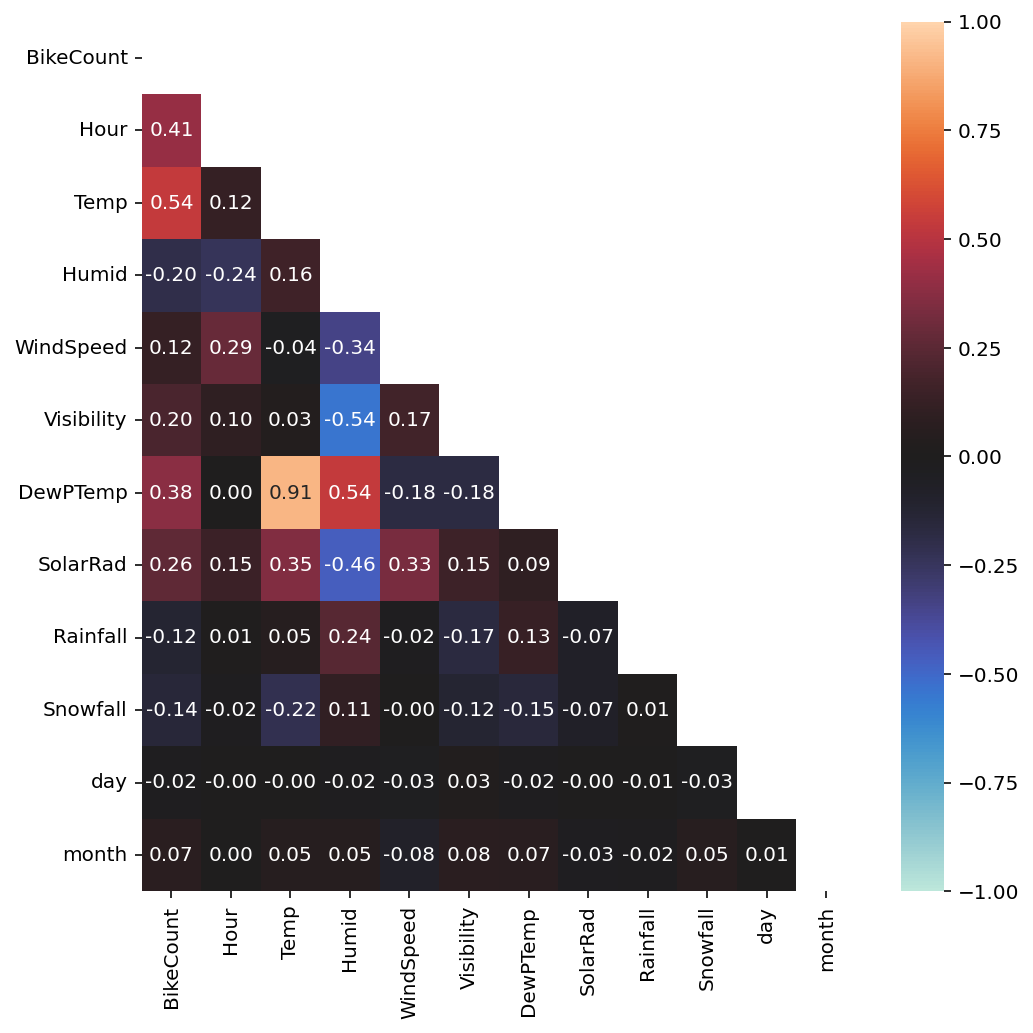

In [111]:
corr_heatmap(df)

In [112]:
# sns.pairplot(df, vars=['Temp', 'Humid', 'WindSpeed', 'Visibility', 
#                        'SolarRad', 'Snowfall', 'Rainfall', 'BikeCount'],
#             corner=True, hue='Season')

In [113]:
# df2 = df.copy()

# # Create new feature from visibility and humidity
# df2['vis_hum'] = np.log((df['Visibility'] / (df['Humid'] + 0.0001)))

# # Drop visibility and humidity
# df2 = df2.drop(columns=['Visibility', 'Humid', 'DewPTemp'])

# corr_heatmap(df2)

# Bike rents prediction Using XGBoost

In [114]:
# Feature and target
X = df.drop(columns=['BikeCount', 'Date'])
y = df.BikeCount

# Encoding
le = LabelEncoder()
categ = ['Holiday', 'Functioning', 'Season']
X[categ] = X[categ].apply(le.fit_transform)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline with baseline XGBoost
pipe = make_pipeline(StandardScaler(), XGBRegressor())

# Cross-validation
cv = cross_val_score(pipe, X_train, y_train, cv=10)
print('5-fold R2 scores:', cv)
print('Mean R2', np.mean(cv))

5-fold R2 scores: [0.9194967  0.87490129 0.89485359 0.89287583 0.90729819 0.90460345
 0.91266287 0.90767725 0.91243925 0.91026545]
Mean R2 0.9037073861427265


In [115]:
# Feature and target
X = df.drop(columns=['BikeCount', 'Date'])
y = df.BikeCount

# Encoding
le = LabelEncoder()
categ = ['Holiday', 'Functioning', 'Season']
X[categ] = X[categ].apply(le.fit_transform)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline with tuned XGBoost
pipe = make_pipeline(StandardScaler(), XGBRegressor(n_estimators=70, max_depth=10, eta=0.08,
                                                    subsample=0.8, reg_lambda=1.2))

# Cross-validation
cv = cross_val_score(pipe, X_train, y_train, cv=10)
print('5-fold R2 scores:', cv)
print('Mean R2', np.mean(cv))

5-fold R2 scores: [0.93557103 0.90365284 0.91939292 0.91355677 0.9057733  0.91029731
 0.9200672  0.91950785 0.92805837 0.92062232]
Mean R2 0.9176499892944046


We achieve an increase from 90.3% R2-score of the baseline XGBoost model to 91.8% R2 of the tuned XGBoost model.

In [116]:
# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

(0.0, 3500.0)

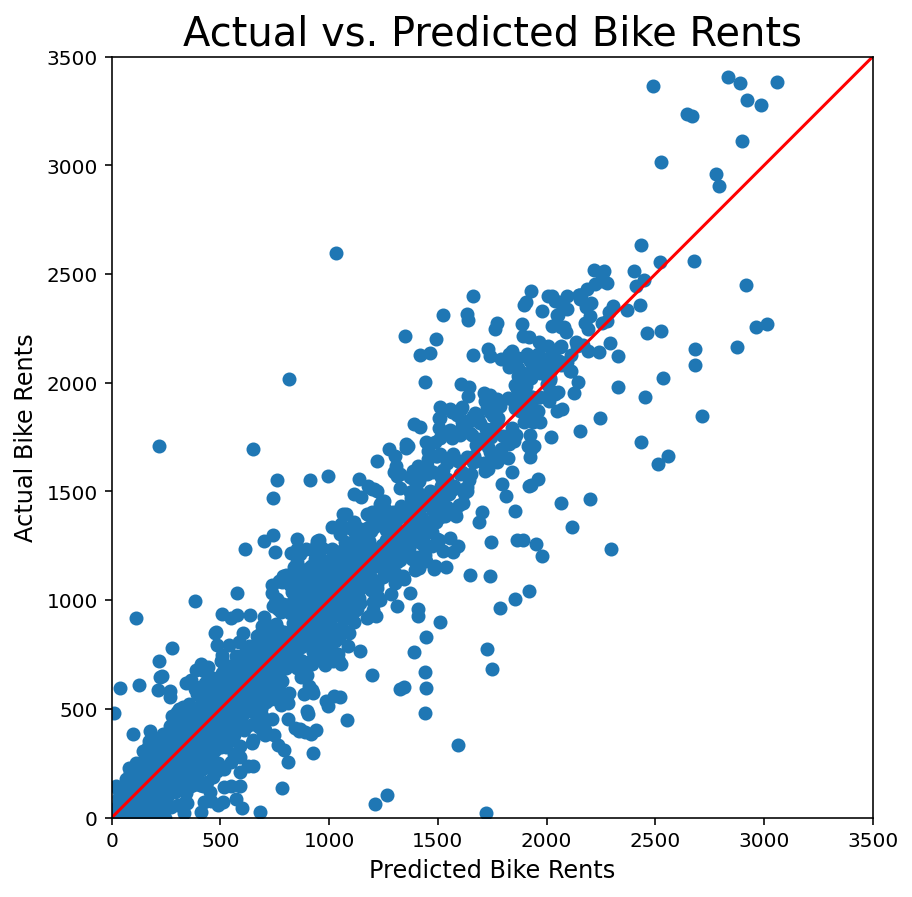

In [117]:
plt.figure(figsize=(7,7))

# 1:1 line
x = np.linspace(0,3500,10)
y = x

# Scatter plot predicted vs. actual
plt.scatter(y_pred, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Predicted Bike Rents', size=12)
plt.ylabel('Actual Bike Rents', size=12)
plt.title('Actual vs. Predicted Bike Rents', size=20)
plt.xlim(0,3500)
plt.ylim(0,3500)

In [118]:
# param = {'xgbregressor__n_estimators': [30, 50, 70],
#          'xgbregressor__max_depth': [5, 10, 20],
#          'xgbregressor__eta': [0.05, 0.08],
#          'xgbregressor__subsample': [0.5, 0.8],
#          'xgbregressor__reg_lambda': [0.7, 1, 1.2]}

# grid = GridSearchCV(pipe, param, verbose=1, cv=5, n_jobs=-1)

# grid.fit(X_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)

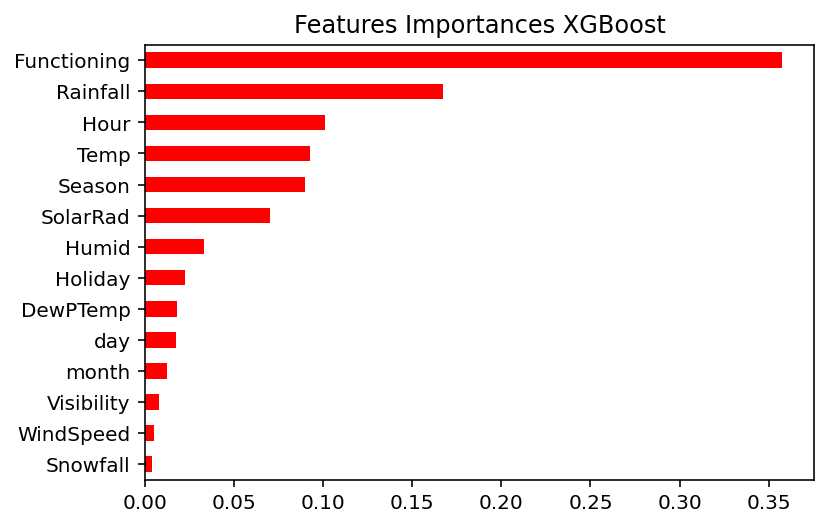

In [119]:
# Create a pd.Series of features importances
fimp = pipe.steps[1][1].feature_importances_
importances = pd.Series(data=fimp,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='red')
plt.title('Features Importances XGBoost')
plt.show()

# Bike rents prediction Using RandomForest

In [120]:
from sklearn import linear_model
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [121]:
# Feature and target
X = df.drop(columns=['BikeCount', 'Date'])
y = df.BikeCount

# Encoding
le = LabelEncoder()
categ = ['Holiday', 'Functioning', 'Season']
X[categ] = X[categ].apply(le.fit_transform)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline with baseline XGBoost
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Cross-validation
cv = cross_val_score(pipe, X_train, y_train, cv=10)
print('5-fold R2 scores:', cv)
print('Mean R2', np.mean(cv))

5-fold R2 scores: [0.91511781 0.88218642 0.89863809 0.89662957 0.89514621 0.90027979
 0.90155683 0.89311076 0.91437633 0.89287513]
Mean R2 0.8989916945548723


In [122]:
# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

(0.0, 3500.0)

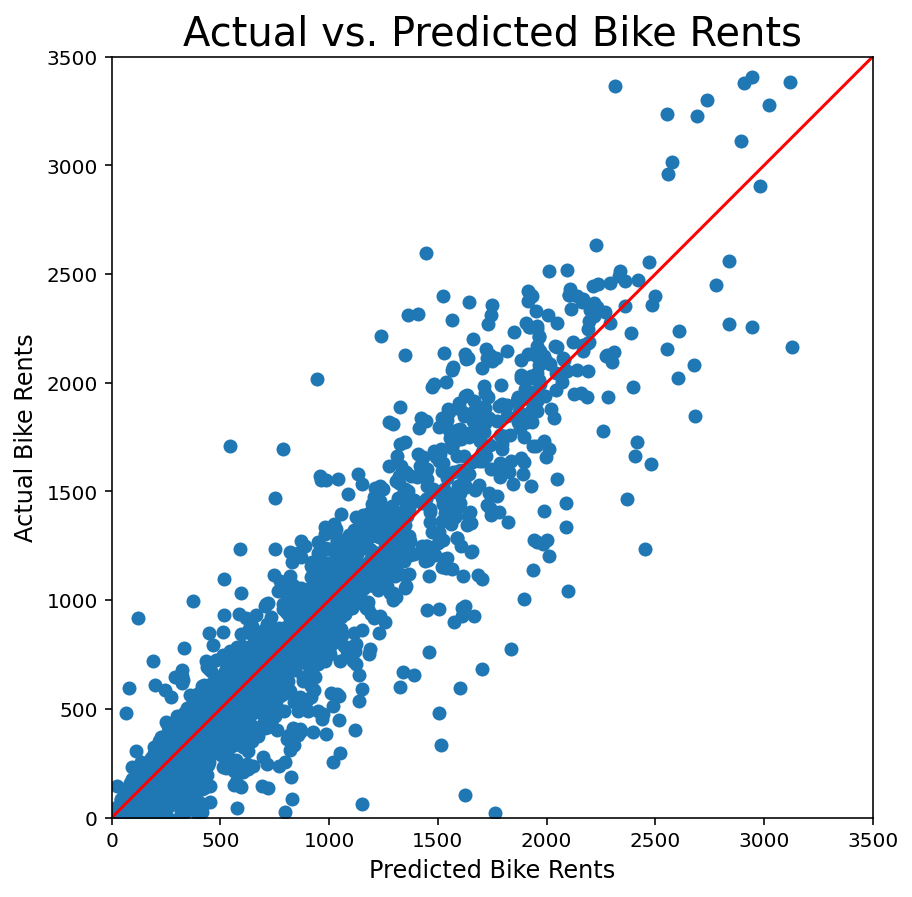

In [123]:
plt.figure(figsize=(7,7))

# 1:1 line
x = np.linspace(0,3500,10)
y = x

# Scatter plot predicted vs. actual
plt.scatter(y_pred, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Predicted Bike Rents', size=12)
plt.ylabel('Actual Bike Rents', size=12)
plt.title('Actual vs. Predicted Bike Rents', size=20)
plt.xlim(0,3500)
plt.ylim(0,3500)

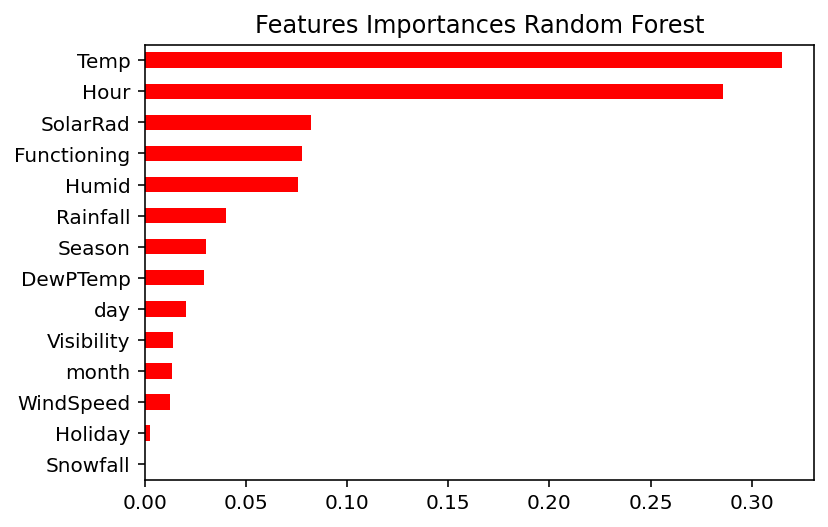

In [124]:
# Create a pd.Series of features importances
fimp = pipe.steps[1][1].feature_importances_
importances = pd.Series(data=fimp,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='red')
plt.title('Features Importances Random Forest')
plt.show()

# Bike rents prediction Using XGBoost  : 91.8%

# Bike rents prediction Using Random Forest : 89.89%